## Setup

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/imyyounge/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(style="whitegrid") # SNS set up
final = pd.read_csv("final.csv") # Import the dataset
final.drop('Unnamed: 0', inplace=True, axis =1) # Need to deal with the columns being different types

In [17]:
# Small dataset for correlation matrix
small = final.iloc[:, : 17] # Select all the columns that are not from one hot encoding
small['logitems'] = np.log(small['items'])
small['logquantity'] = np.log(small['quantity'])
small.drop(["bnf.paragraph", "bnf.name1", "bnf.chapter", "bnf.section"], axis = 1, inplace = True)
small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_open                     3652 non-null   float64
 1   number_of_patients            3652 non-null   float64
 2   join_parent_date              3652 non-null   float64
 3   left_parent_date              2869 non-null   float64
 4   items                         3652 non-null   float64
 5   nic                           3652 non-null   float64
 6   act.cost                      3652 non-null   float64
 7   quantity                      3652 non-null   float64
 8   ccg_code1                     3652 non-null   int64  
 9   high_level_health_geography1  3652 non-null   int64  
 10  commissioner1                 3652 non-null   int64  
 11  sha1                          3652 non-null   int64  
 12  e8...1                        3652 non-null   int64  
 13  log

# Initial boxplots

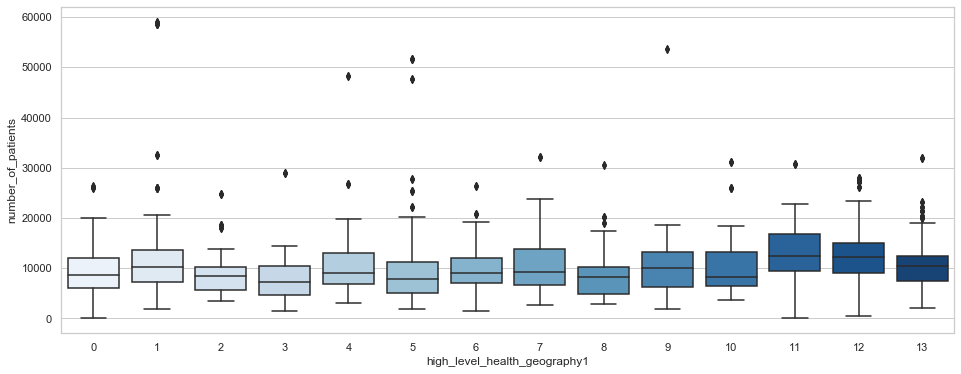

In [13]:
plt.figure(figsize=(16, 6))
cmap = sns.diverging_palette(15, 220, as_cmap=True, center="light", s = 99)
fig = sns.boxplot(y=small['number_of_patients'], x=small["high_level_health_geography1"], palette="Blues") # The x value is what it will be separated by
ax.set(xlabel='Regional health area number', ylabel='Number of patients')
fig = fig.get_figure()
fig.savefig ('High_level_health_geography.jpg', )


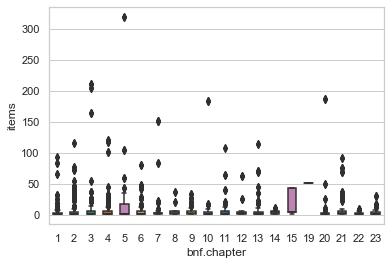

In [81]:
#small.boxplot(by='bnf.chapter', column=['items'], grid=False, figsize=(12,12)) # Need to check which columns the NHS came up with 

# Different way to achieve the same thing
bplot = sns.boxplot(y='items', x='bnf.chapter', data=small, width=0.5, palette="colorblind")

#bplot=sns.stripplot(y='items', x='bnf.chapter', data=small, 
                   #jitter=True, marker='o', alpha=0.5,
                   #color='black', figsize=(12,12))

# Correlation matrix

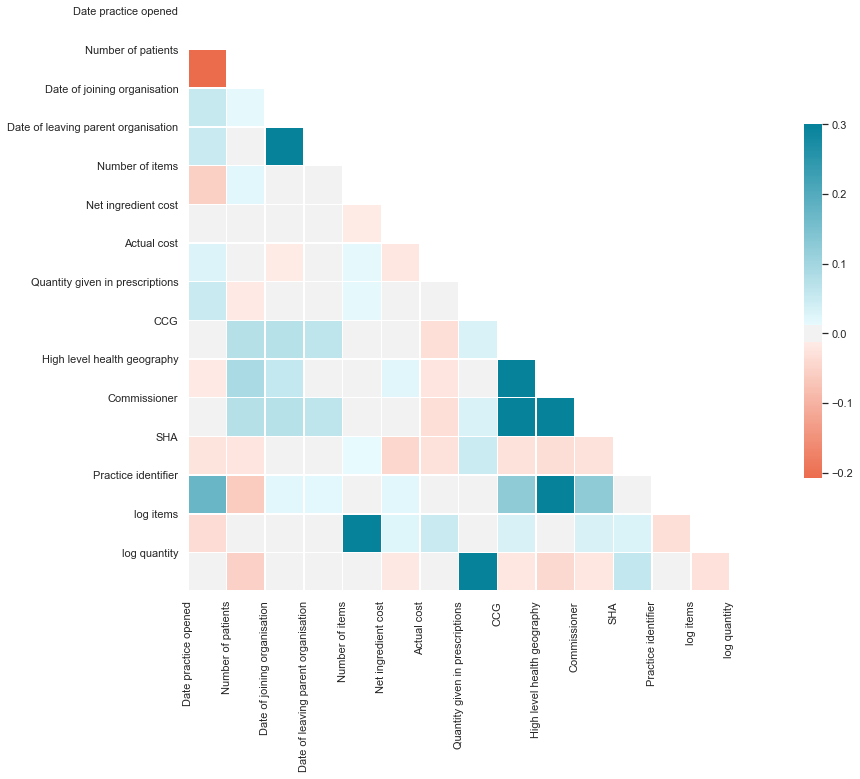

In [27]:
corr = small.corr() # Compute the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(13, 13)) # Set up the matplotlib figure
cmap = sns.diverging_palette(15, 220, as_cmap=True, center="light", s = 99) # Generate a custom diverging colormap, have changed so red is negative
    # center = whether white or black in middle of colour range
    # s : saturation. Integer 1 - 100
heat = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
           ) # Draw the heatmap with the mask and correct aspect ratio
list_labels = ('Date practice opened', 'Number of patients', 'Date of joining organisation', 'Date of leaving parent organisation',
               'Number of items', 'Net ingredient cost', 'Actual cost', 'Quantity given in prescriptions', 'CCG', 'High level health geography', 'Commissioner', 'SHA', 'Practice identifier', 'log items', 'log quantity')
plt.xticks(np.arange(15), list_labels) # Change the x axis labels to actual names
plt.yticks(np.arange(15), list_labels ) # Change the y axis labels
heat = heat.get_figure()
heat.savefig ('Correlation heatmap')

In [ ]:
# Group by practice if needed
list(x_grouped)[0]

# Histograms

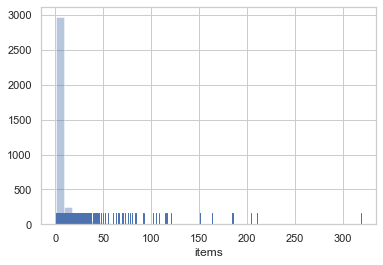

In [77]:
sns.distplot(small['items'], rug=True, kde=False, bins = 40)

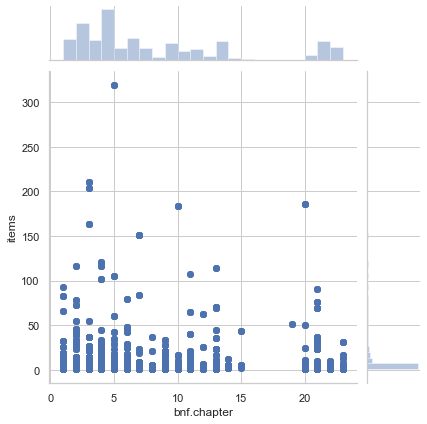

In [84]:
sns.jointplot(x="bnf.chapter", y="items", data=small)

AttributeError: 'JointGrid' object has no attribute 'get_figure'

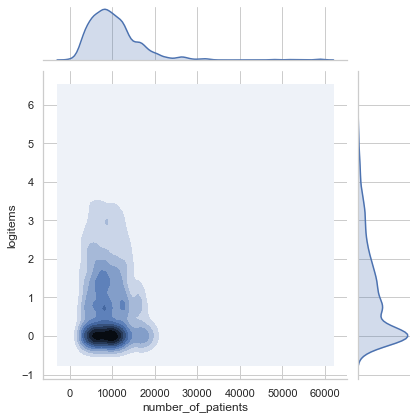

In [31]:
# May be better to look at items on a log scale?
joint = sns.jointplot(x="number_of_patients", y="logitems", data=small, kind="kde")
fig = joint.get_figure()
fig.savefig ('Number of patients and items.jpeg')

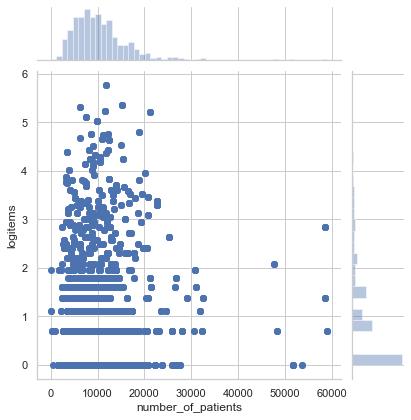

In [33]:
sns.jointplot(x="number_of_patients", y="logitems", data=small)

In [107]:
#for i in small.columns:
    #plt.figure()
    #plt.hist(small[i])
    
# Plots a histogram for every column in the small dataset

# Barplots

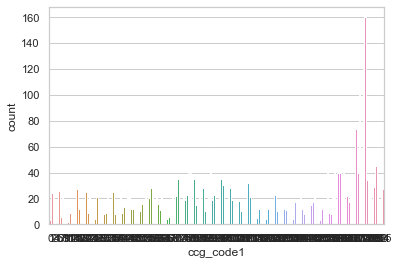

In [117]:
sns.countplot(x='ccg_code1', data=small) # CCG and commissioner1 give the same plot

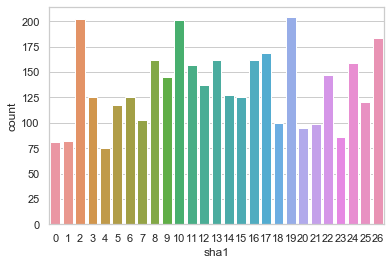

In [119]:
sns.countplot(x='sha1', data=small) # There are 28 SHA's 

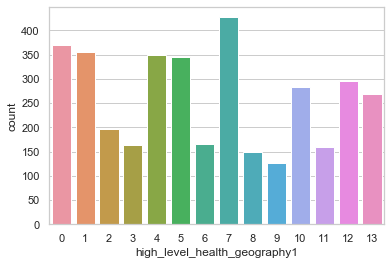

In [120]:
sns.countplot(x='high_level_health_geography1', data=small)  # There are 13 high level health geographies

# Kernel density distributions

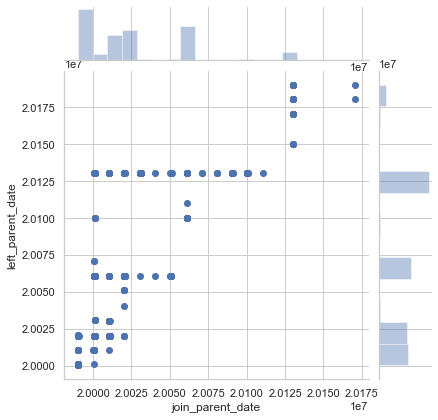

In [53]:
sns.jointplot(x="join_parent_date", y="left_parent_date", data=small)

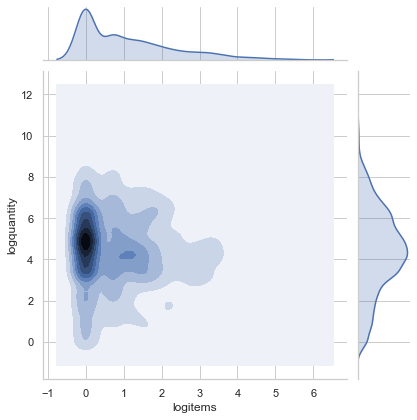

In [6]:
a = sns.jointplot(x="logitems", y="logquantity", data=small, kind="kde")
a

# Save file as a jpeg

In [10]:
# Save a file as a jpeg
plot_file_name="boxplot_and_swarmplot_with_seaborn.jpg" # This might not be needed to be honest
a.savefig(plot_file_name,format='jpeg', dpi=100)